In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [ ]:
X,y = make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
clf = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_pred)
print('accuracy :',accuracy)

accuracy : 0.835


In [ ]:
from sklearn.metrics import precision_score
precission = precision_score(y_test,y_pred)
print('Precision : ',precission)

Precision :  0.8362068965517241


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred)
print('recall : ',recall)

recall :  0.8738738738738738


In [ ]:
from sklearn.metrics import f1_score
f1score = f1_score(y_test,y_pred)
print('F1 Score : ',f1score)

F1 Score :  0.8546255506607928


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix : ')
print(cm)

Confusion matrix : 
[[70 19]
 [14 97]]


|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| Actual Positive| True Positive      | False Negative     |
| Actual Negative| False Positive     | True Negative      |


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        89
           1       0.84      0.87      0.85       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



Classification Report:

Definisi: Classification report adalah laporan yang memberikan ringkasan statistik seperti precision, recall, f1-score, dan support untuk setiap kelas.
Informasi yang Diberikan: Classification report memberikan informasi lebih lanjut daripada confusion matrix. Ini mencakup **precision (kemampuan model untuk tidak memberikan prediksi positif yang salah)**, **recall (kemampuan model untuk mendeteksi semua instance positif)**, **f1-score (ukuran rata-rata harmonik antara precision dan recall), dan support (jumlah instance dalam setiap kelas).**
Penggunaan: Berguna untuk mendapatkan pemahaman yang lebih rinci tentang kinerja model, terutama ketika terlibat dengan multiple kelas.

In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

ROC AUC Score: 0.8301953639032291


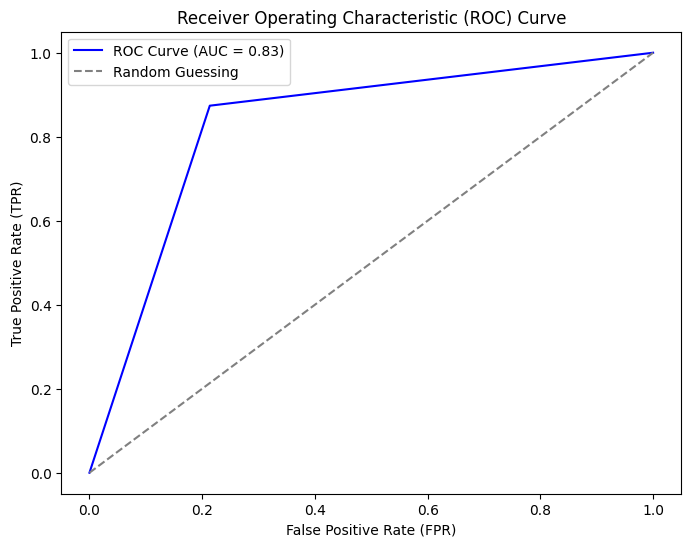

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc}')



# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [ ]:
auc = roc_auc_score(y_test,y_pred)

In [ ]:
roc_trace = go.Scatter(
    x=fpr,
    y=tpr,
    name='ROC Curve',
    mode='lines',
    line=dict(color='green')
)

In [ ]:
diag_trace = go.Scatter(
    x=[0,1],
    y=[0,1],
    name='Diagonal',
    mode='lines',
    line=dict(color='grey',dash='dash')
)

In [ ]:
layout = go.Layout(
    title='AUC & ROC Curve',
    xaxis=dict(title='False Positive Rate'),
    yaxis = dict(title='True Positive Rate'),
    showlegend=True
)

In [ ]:
fig = go.Figure(data=[roc_trace,diag_trace],layout=layout)

In [ ]:
fig.add_annotation(
    x=0.5,
    y=0.1,
    text=f"AUC = {auc:.4f}",
    showarrow=False,
    font=dict(size=16)
)

In [ ]:
auc

0.8301953639032291